In [1]:
import seaborn as sns
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import ast

## Extract results from log files and create a dataframe

In [21]:
logfile_name = 'results.txt'
auroc_columns = ['Drug', 'Dataset', 'Auroc', 'Method']
auprc_columns = ['Drug', 'Dataset', 'Auprc', 'Method']
auroc_table_columns = ['Drug', 'Dataset', 'Auroc', 'Method']
auprc_table_columns = ['Drug', 'Dataset', 'Auprc', 'Method']

auroc_result_dataframe = pd.DataFrame(columns=auroc_columns)
auprc_result_dataframe = pd.DataFrame(columns=auprc_columns)
result_path_moli = Path('..', 'results', 'bayesian_optimisation')
result_path_super_felt = Path('..', 'results', 'super.felt')
result_paths = [result_path_moli, result_path_super_felt]
method_folder = ['moli_ae', 'random_moli', 'random_super_felt',
                'supervised-ae']

for result_path in result_paths:
    drug_paths =  [x for x in result_path.iterdir()]
    for drug_path in drug_paths:
        drug = drug_path.stem
        #method_folder = [path.stem for path in drug_path.iterdir()]
        for method in method_folder:
            log_path = drug_path / method / logfile_name
            if log_path.is_file():
                with open(log_path, 'r') as log_file:
                    for line in log_file:
                        if f'extern auroc list' in line:
                            extern_auroc_list = ast.literal_eval(line.split(':')[-1].strip())
                            for extern_auroc in extern_auroc_list:
                                auroc_result_dataframe = auroc_result_dataframe.append(
                                pd.DataFrame([[drug, f'Extern', extern_auroc, method]], 
                                             columns=auroc_columns))
                        if f'extern auprc list' in line:
                            extern_auprc_list = ast.literal_eval(line.split(':')[-1].strip())
                            for extern_auprc in extern_auprc_list:
                                auprc_result_dataframe = auprc_result_dataframe.append(
                                pd.DataFrame([[drug, f'Extern', extern_auprc, method]], 
                                             columns=auprc_columns))
                        if f'test auroc list' in line:
                            test_auroc_list = ast.literal_eval(line.split(':')[-1].strip())
                            for test_auroc in test_auroc_list:
                                auroc_result_dataframe = auroc_result_dataframe.append(
                                pd.DataFrame([[drug, f'Test', test_auroc, method]], 
                                             columns=auroc_columns))
                        if f'test auprc list' in line:
                            test_auprc_list = ast.literal_eval(line.split(':')[-1].strip())
                            for test_auprc in test_auprc_list:
                                auprc_result_dataframe = auprc_result_dataframe.append(
                                pd.DataFrame([[drug, f'Test', test_auprc, method]], 
                                             columns=auprc_columns))

## Beautify strings

In [22]:
rename_dict = {'moli_ae': 'MOLI+R',
               'random_moli': 'MOLI', 
               'noisy_moli-ae': 'MOLI+N+R',
               'random_super_felt': 'Super.FELT',
                'supervised-ae': 'Super.FELT+R',
               'Gemcitabine_tcga': 'Gemcitabine TCGA',
               'Gemcitabine_pdx': 'Gemcitabine PDX',
}

auroc_result_dataframe = auroc_result_dataframe.replace(rename_dict)
auprc_result_dataframe  = auprc_result_dataframe.replace(rename_dict)

## Plot categorical auroc boxplots

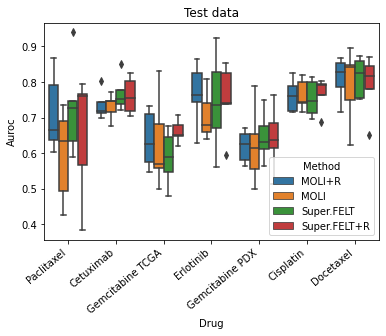

In [23]:
test_results = auroc_result_dataframe[auroc_result_dataframe['Dataset'] == 'Test']
boxplot_test = sns.boxplot(x='Drug', y='Auroc', hue='Method',  data=test_results)
boxplot_test.set_xticklabels(boxplot_test.get_xticklabels(), rotation=40, ha="right")
plt.title('Test data')
plt.savefig('auroc_boxplot_test.pdf', bbox_inches="tight")

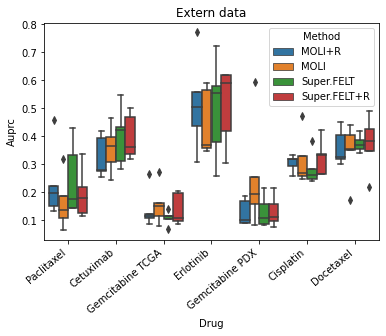

In [24]:
plt.clf()
extern_results = auprc_result_dataframe[auprc_result_dataframe['Dataset'] == 'Test']
boxplot_extern = sns.boxplot(x='Drug', y='Auprc', hue='Method',  data=extern_results)
boxplot_extern.set_xticklabels(boxplot_extern.get_xticklabels(), rotation=40, ha="right")
plt.title('Extern data')
plt.savefig('auprc_boxplot_extern.pdf', bbox_inches="tight")

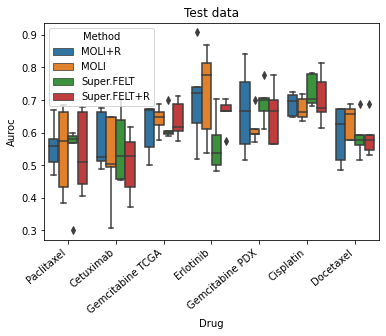

In [25]:
plt.clf()
test_results = auroc_result_dataframe[auroc_result_dataframe['Dataset'] == 'Extern']
boxplot_test = sns.boxplot(x='Drug', y='Auroc', hue='Method',  data=test_results)
boxplot_test.set_xticklabels(boxplot_test.get_xticklabels(), rotation=40, ha="right")
plt.title('Test data')
plt.savefig('auroc_boxplot_test.pdf', bbox_inches="tight")

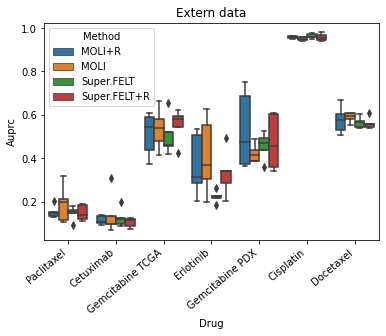

In [26]:
plt.clf()
extern_results = auprc_result_dataframe[auprc_result_dataframe['Dataset'] == 'Extern']
boxplot_extern = sns.boxplot(x='Drug', y='Auprc', hue='Method',  data=extern_results)
boxplot_extern.set_xticklabels(boxplot_extern.get_xticklabels(), rotation=40, ha="right")
plt.title('Extern data')
plt.savefig('auprc_boxplot_extern.pdf', bbox_inches="tight")